In [31]:
#Kevin Bravo
#imporatamos las librerias necesarias
import keras
import random
from keras.preprocessing import image
from glob import glob
import cv2, os
import numpy as np
import matplotlib.pyplot as plt

In [39]:
#encontramos la base de datos
path = 'C:/Users/Kevin/dogscats/train' 
#vaiables del tamaño de la imagen
ROW, COL = 96,96

In [40]:
dogs, cats=[],[]
y_dogs, y_cats=[],[]

In [44]:
#cargan imagenes de perros
dog_path = os.path.join(path, 'dogs', 'dog*')
for dog_img in glob(dog_path):
    dog = cv2.imread(dog_img)
    dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY)
    dog = cv2.resize(dog, (ROW,COL))
    dog = image.img_to_array(dog)
    dogs.append(dog)
###################################################
# imagenes gatos
cat_path = os.path.join(path,'cats','cat*')
for cat_img in glob(cat_path):
    cat = cv2.imread(cat_img)
    cat = cv2.cvtColor(cat,cv2.COLOR_BGR2GRAY)
    cat = cv2.resize(cat, (ROW,COL))
    cat = image.img_to_array(cat)
    cats.append(cat)
#####################################################
print('Se han cargado todas las imagenes')

Se han cargado todas las imagenes


In [45]:
#se muestran las longuitudes de los arreglos de perros y gatos
print('Longuitud del array de perros:{}\nLonguitud del array de gatos{}'.format(len(dogs),len(cats)))

Longuitud del array de perros:11500
Longuitud del array de gatos11500


In [46]:
#definimos las clases
classes = ['dog','cat']

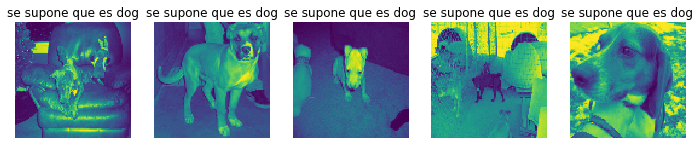

In [48]:
plt.figure(figsize=(12,8))
for i in range(5):
    plt.subplot(1,5, i+1)
    img = image.array_to_img(random.choice(dogs))
    plt.imshow(img)
    
    plt.axis('off')
    plt.title('se supone que es {}'.format(classes[0]))
plt.show()

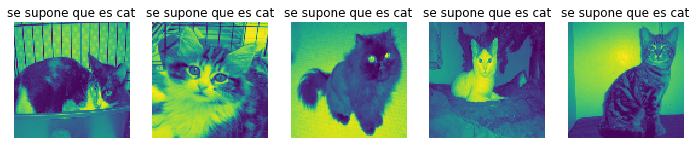

In [49]:
plt.figure(figsize=(12,8))
for i in range(5):
    plt.subplot(1,5, i+1)
    img = image.array_to_img(random.choice(cats))
    plt.imshow(img)
    
    plt.axis('off')
    plt.title('se supone que es {}'.format(classes[1]))
plt.show()

In [50]:
y_dogs = [1 for item in enumerate (dogs)]
y_cats = [0 for item in enumerate (cats)]

In [52]:
dogs = np.asarray(dogs).astype('float32')
cats = np.asarray(cats).astype('float32')
y_dogs = np.asarray(y_dogs).astype('int32')
y_cats = np.asarray(y_cats).astype('int32')
dogs /= 255
cats /= 255

In [53]:
x = np.concatenate ((dogs,cats), axis=0)
y = np.concatenate ((y_dogs,y_cats), axis=0)

In [57]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Flatten, Dropout, Activation
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras.models import save_model, load_model

In [59]:
IMG_CHANNEL = 1
BATCH_SIZE = 128
N_EPOCH = 15
VERBOSE = 2
VALIDAION_SPLIT = .2
OPTIM = Adam()
N_CLASSES = len(classes)

In [60]:
y = np_utils.to_categorical(y, N_CLASSES)
print('One-Hot Encoding listo')

One-Hot Encoding listo


In [66]:
model = Sequential([
    Conv2D(32, (3,3), padding='same', input_shape=(ROW, COL, IMG_CHANNEL), activation='relu'),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.25),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(.5),
    Dense(N_CLASSES, activation='softmax')
])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 96, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 64)      

In [67]:
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
checkpoint = ModelCheckpoint('model_checkpoint/dogs_vs_cats_redux_checkpoint.h5')

In [69]:
model.fit(x, y, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDAION_SPLIT, verbose=VERBOSE)


Train on 18400 samples, validate on 4600 samples
Epoch 1/15
 - 597s - loss: 0.6632 - accuracy: 0.6202 - val_loss: 1.0856 - val_accuracy: 0.0028
Epoch 2/15
 - 599s - loss: 0.5858 - accuracy: 0.6783 - val_loss: 0.9087 - val_accuracy: 0.3813
Epoch 3/15
 - 586s - loss: 0.5407 - accuracy: 0.7233 - val_loss: 0.7556 - val_accuracy: 0.5957
Epoch 4/15
 - 598s - loss: 0.5029 - accuracy: 0.7493 - val_loss: 0.6708 - val_accuracy: 0.6502
Epoch 5/15
 - 633s - loss: 0.4609 - accuracy: 0.7805 - val_loss: 0.4991 - val_accuracy: 0.7565
Epoch 6/15
 - 624s - loss: 0.4181 - accuracy: 0.8091 - val_loss: 0.6032 - val_accuracy: 0.6970
Epoch 7/15
 - 630s - loss: 0.3681 - accuracy: 0.8365 - val_loss: 0.6449 - val_accuracy: 0.6909
Epoch 8/15
 - 619s - loss: 0.3352 - accuracy: 0.8545 - val_loss: 0.4506 - val_accuracy: 0.8007
Epoch 9/15
 - 608s - loss: 0.2906 - accuracy: 0.8774 - val_loss: 0.4336 - val_accuracy: 0.8146
Epoch 10/15
 - 621s - loss: 0.2559 - accuracy: 0.8946 - val_loss: 0.5462 - val_accuracy: 0.7613

In [71]:
scores = model.evaluate(x, y, verbose=2)
print('ACCURACY DEL MODELO\n{}: {}%'.format(model.metrics_names[1], scores[1]*100))

ACCURACY DEL MODELO
accuracy: 91.79999828338623%
